In [2]:
import numpy as np
import pandas as pd
x_dt = pd.read_csv('train.csv')

In [3]:
x_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
total_data_number = x_dt.shape[0]
feature_num = x_dt.shape[1]

In [5]:
total_data_number

891

In [6]:
# pre-processing 
# firstly, clearly the 'passengerid' and 'passengername' are irrelavant to whether they survive
# also the 'ticket number' can't denote their class and bad in evaluation
# so i would like to delete these these three cols
x_dt = x_dt.drop(labels=['PassengerId','Name','Ticket'], axis=1)


In [7]:
# convert sex into 0 or 1
# convert Embarked into 1,2,3
x_dt.loc[x_dt['Sex'] == 'male','Sex'] = 1
x_dt.loc[x_dt['Sex'] == 'female','Sex'] = 0
x_dt.loc[x_dt['Embarked'] == 'Q','Embarked'] = 1
x_dt.loc[x_dt['Embarked'] == 'S','Embarked'] = 2
x_dt.loc[x_dt['Embarked'] == 'C','Embarked'] = 3

In [8]:
print(x_dt)

     Survived  Pclass Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3   1  22.0      1      0   7.2500   NaN        2
1           1       1   0  38.0      1      0  71.2833   C85        3
2           1       3   0  26.0      0      0   7.9250   NaN        2
3           1       1   0  35.0      1      0  53.1000  C123        2
4           0       3   1  35.0      0      0   8.0500   NaN        2
..        ...     ...  ..   ...    ...    ...      ...   ...      ...
886         0       2   1  27.0      0      0  13.0000   NaN        2
887         1       1   0  19.0      0      0  30.0000   B42        2
888         0       3   0   NaN      1      2  23.4500   NaN        2
889         1       1   1  26.0      0      0  30.0000  C148        3
890         0       3   1  32.0      0      0   7.7500   NaN        1

[891 rows x 9 columns]


In [9]:
# and clearly we can see the there are seems a lot of missing data in different features
# so lets count the number of missing data.
nan_num = x_dt.isna().sum()
print(nan_num)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [10]:
# from the chart above, the percentage of missing data for Cabin feature is 687/891 , very high. 
# so the feature is useless, its better to delete it
x_dt = x_dt.drop(labels=['Cabin'], axis=1)

<Figure size 600x400 with 0 Axes>

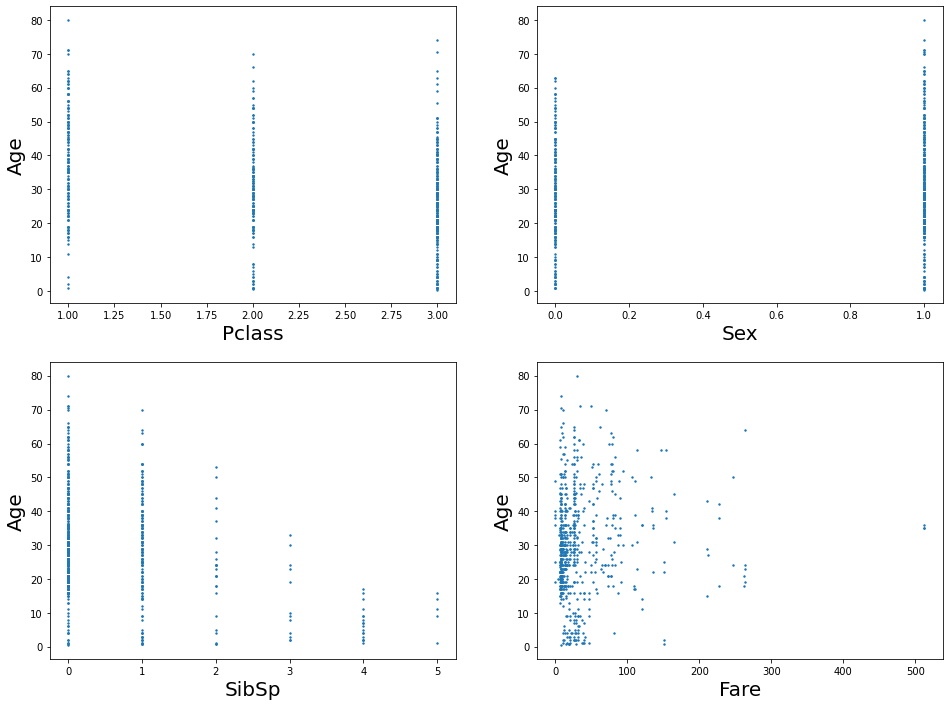

In [11]:
# So the nan data only exists on age features
# so lets take a look the a chart between "class" and "age" two features
from matplotlib import pyplot as plt 
plt.figure(dpi=100)
plt.figure(figsize=(16, 12))
ax1 = plt.subplot(221)
plt.scatter(x_dt['Pclass'],x_dt['Age'],s=2)
plt.xlabel('Pclass', fontsize=20)
plt.ylabel('Age', fontsize=20)

ax2 = plt.subplot(222)
plt.scatter(x_dt['Sex'],x_dt['Age'],s=2)
plt.xlabel('Sex', fontsize=20)
plt.ylabel('Age', fontsize=20)

ax3 = plt.subplot(223)
plt.scatter(x_dt['SibSp'],x_dt['Age'],s=2)
plt.xlabel('SibSp', fontsize=20)
plt.ylabel('Age', fontsize=20)

ax4 = plt.subplot(224)
plt.scatter(x_dt['Fare'],x_dt['Age'],s=2)
plt.xlabel('Fare', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.show()

In [12]:
# So from the above four graph that the age is well distributed without any linear relationship between other feastures
# its very hard to predic these 177 missing data. its so better to just delete plus two data with missing Embarked
X = x_dt.dropna(axis=0, how='any').copy()

In [13]:
# change all data type into number
X = X.astype(float)

In [14]:
print(X)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0.0     3.0  1.0  22.0    1.0    0.0   7.2500       2.0
1         1.0     1.0  0.0  38.0    1.0    0.0  71.2833       3.0
2         1.0     3.0  0.0  26.0    0.0    0.0   7.9250       2.0
3         1.0     1.0  0.0  35.0    1.0    0.0  53.1000       2.0
4         0.0     3.0  1.0  35.0    0.0    0.0   8.0500       2.0
..        ...     ...  ...   ...    ...    ...      ...       ...
885       0.0     3.0  0.0  39.0    0.0    5.0  29.1250       1.0
886       0.0     2.0  1.0  27.0    0.0    0.0  13.0000       2.0
887       1.0     1.0  0.0  19.0    0.0    0.0  30.0000       2.0
889       1.0     1.0  1.0  26.0    0.0    0.0  30.0000       3.0
890       0.0     3.0  1.0  32.0    0.0    0.0   7.7500       1.0

[712 rows x 8 columns]


In [15]:
# reset an split
X = X.reset_index(drop=True)
n_x = X.shape[0]
train_num = int(0.8* n_x)
test_num = n_x-train_num

rand_indices = np.random.permutation(n_x)
train_indices = rand_indices[0:train_num]
test_indices = rand_indices[train_num:n_x]

x_train = X.iloc[train_indices][['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
x_test = X.loc[test_indices][['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y_train = X.loc[train_indices]['Survived']
y_test = X.loc[test_indices]['Survived']

# re-index
x_train = x_train.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(569, 7)
(143, 7)
(569,)
(143,)


In [16]:
# create decision_tree by sklearn package
from sklearn import tree


max_depth_range = range(1,7)
train_accuracy = []
test_accuracy = []
for depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=depth)
    clf.fit(x_train, y_train)
    score1 = clf.score(x_train,y_train)
    score2 = clf.score(x_test,y_test)
    train_accuracy.append(score1)
    test_accuracy.append(score2)
print("train_accuracy is :",train_accuracy)
print("test_accuracy is :",test_accuracy)

train_accuracy is : [0.7803163444639719, 0.7873462214411248, 0.8347978910369068, 0.843585237258348, 0.8717047451669596, 0.875219683655536]
test_accuracy is : [0.7762237762237763, 0.8041958041958042, 0.7482517482517482, 0.7762237762237763, 0.7622377622377622, 0.7902097902097902]


DecisionTreeClassifier(max_depth=2)


[Text(697.5, 906.0, 'Sex <= 0.5\ngini = 0.482\nsamples = 569\nvalue = [338, 231]\nclass = 0'),
 Text(348.75, 543.6, 'Pclass <= 2.5\ngini = 0.368\nsamples = 206\nvalue = [50, 156]\nclass = 1'),
 Text(174.375, 181.19999999999993, 'gini = 0.119\nsamples = 126\nvalue = [8, 118]\nclass = 1'),
 Text(523.125, 181.19999999999993, 'gini = 0.499\nsamples = 80\nvalue = [42, 38]\nclass = 0'),
 Text(1046.25, 543.6, 'Pclass <= 1.5\ngini = 0.328\nsamples = 363\nvalue = [288, 75]\nclass = 0'),
 Text(871.875, 181.19999999999993, 'gini = 0.491\nsamples = 81\nvalue = [46, 35]\nclass = 0'),
 Text(1220.625, 181.19999999999993, 'gini = 0.243\nsamples = 282\nvalue = [242, 40]\nclass = 0')]

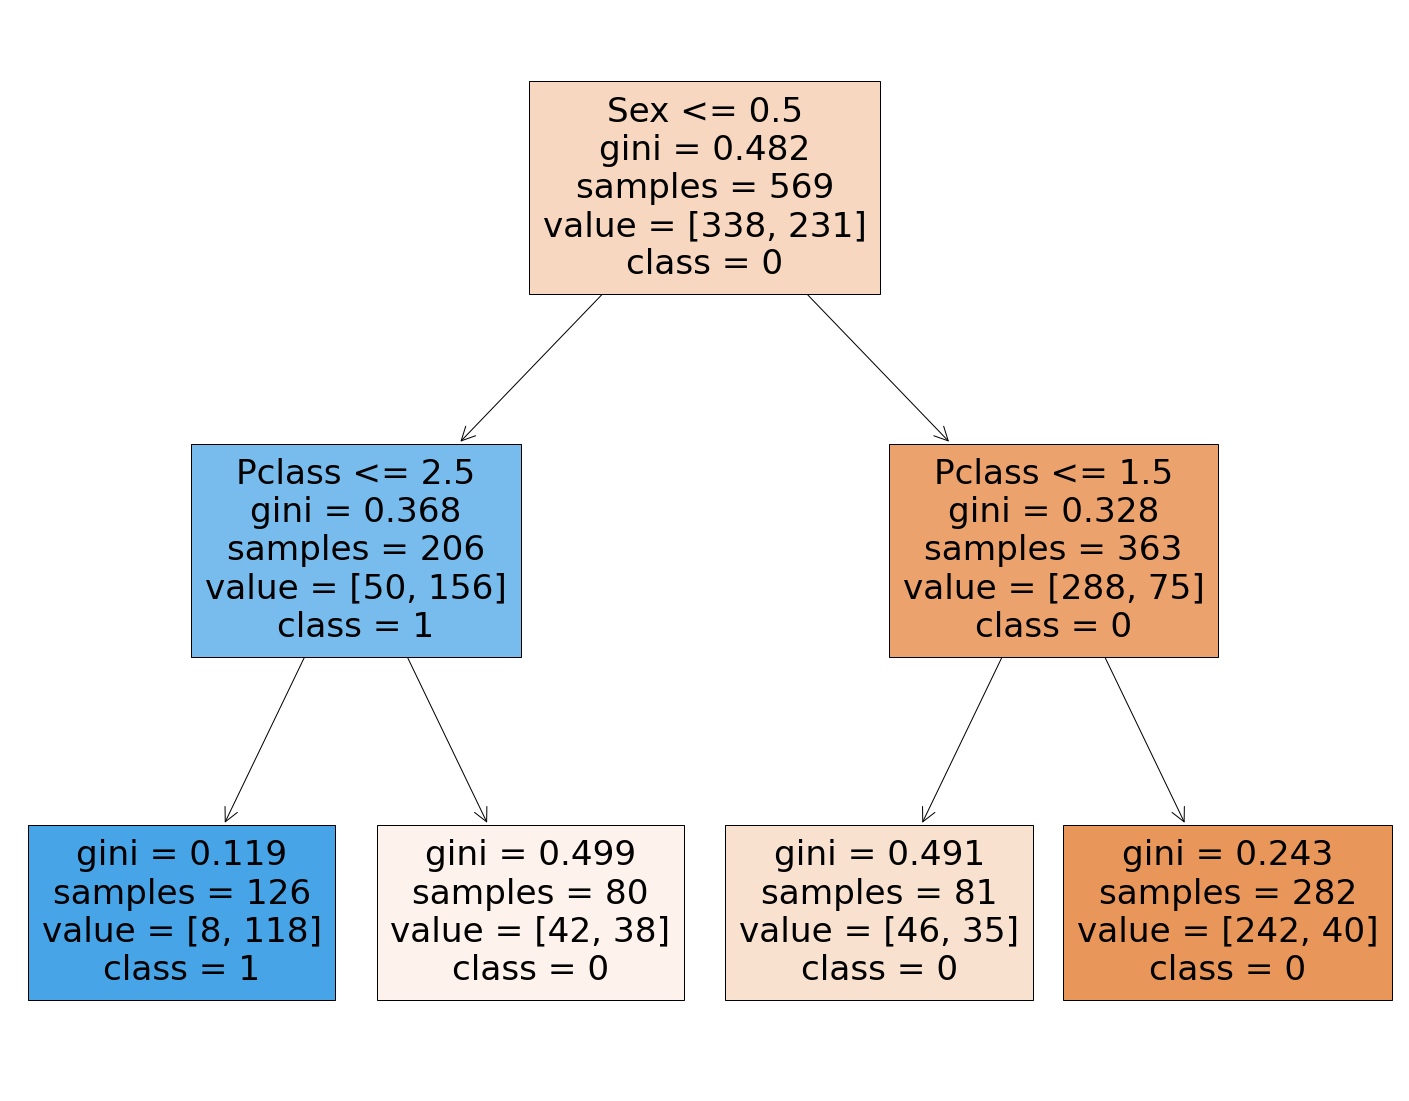

In [17]:
# From two accuracy_list, for not overfitting our model, i think max_depth is the best choice
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=2)
clf.fit(x_train, y_train)
print(clf)

fig = plt.figure(figsize=(25,20))
a = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
b = ['0','1']
tree.plot_tree(clf,feature_names=a,class_names=b,filled=True)


In [18]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, x_test, y_test, n_repeats=10,random_state=0)
#its the importance of each features in the decision tree model
print(result.importances_mean)

# definitely we can see the top2 features are :
#      sex:0.18041958  ,Pclass: 0.11608392

[0.11608392 0.18041958 0.         0.         0.         0.
 0.        ]


In [1]:
# My inclusion for this question:
#      The best accuracy for testdata is 80.42 with max_depth = 2
#      Whether survive is only determined "Sex" and Pclass
#      Females were more likely  to survive than males
#      Passengers from higher class(1 > 2 >3) were more likely to survive
#      It recalls me the story of Titanic 
#      that a lot of gentlemen gave up their chances of getting on escape ships Gave to women
#      Respect!